1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. <br>
Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
mnist = pd.read_csv("mnist_784.csv")
mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [15]:
len(mnist)

70000

In [18]:
# X & y
X = mnist.iloc[:,:-1].values
y = mnist.iloc[:, -1].values

In [21]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [68]:
# split train and test

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Using `GridSearchCV` for choosing best parameters to train the model

In [29]:
from sklearn.model_selection import GridSearchCV

params = [{'weights' : ['uniform', 'distance'], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, params, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  42.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  39.7s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  38.7s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  38.7s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  39.2s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  38.1s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  37.9s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  38.3s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  38.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  38.4s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  47.6s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [31]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [33]:
grid_search.best_score_

0.9716166666666666

In [34]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [39]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

2. Write a function that can shift an MNIST image in any direction(left, right, up, or down) by one pixel. Then, for each image in   the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set.You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [42]:
from scipy.ndimage import shift

In [45]:
def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dy, dx], cval=0, mode='constant')
    return shifted_image.reshape([-1])

In [56]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 3)
shifted_image_right = shift_image(image, 5, 0)

Visualize the shifted image

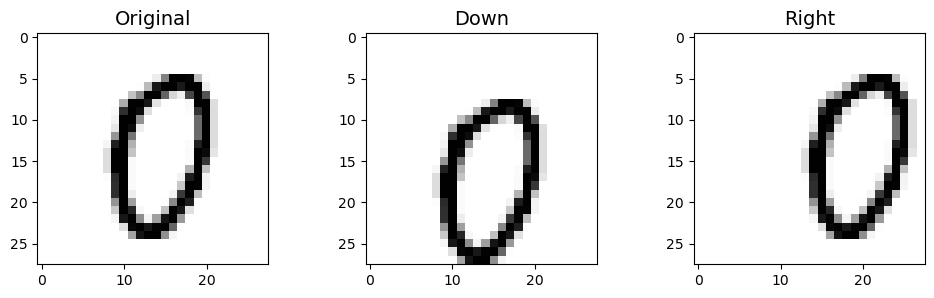

In [57]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title('Original', fontsize=14)
plt.imshow(image.reshape(28,28), interpolation='nearest', cmap='Greys')
plt.subplot(132)
plt.title("Down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28,28), interpolation='nearest', cmap='Greys')
plt.subplot(133)
plt.title("Right", fontsize=14)
plt.imshow(shifted_image_right.reshape(28,28), interpolation='nearest', cmap='Greys')
plt.show()

Let's create a 4 side shifted image for every image in training dataset.

In [59]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((0,1), (0,-1), (1,0),(-1,0)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

In [70]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

Shuffle index

In [71]:
shuffle_idx = np. random.permutation(len(X_train_augmented))
shuffle_idx

array([ 80176, 210749,  14642, ...,  70770, 213770, 181704])

In [72]:
len(shuffle_idx)

300000

In [73]:
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [79]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [80]:
y_pred = knn_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9763

By simply augmenting the data, we got a 0.5% accuracy boost. :)